<a href="https://colab.research.google.com/github/ApusDT/-Red-neuronal-de-clasificaci-n-con-Keras---FashionMnist/blob/main/Copia_de_Copia_de_Entreg_1_Red_neur_Clasificaci%C3%B3n_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Se importan librerías de entorno de ejecucuón primario
import numpy as np
np.random.seed(2)

import matplotlib.pyplot as plt
%matplotlib notebook


In [ ]:
# Se importa TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Se importan módulos necesarios
from keras.datasets import fashion_mnist
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers.core import Flatten, Dense
from keras.optimizers import SGD

Se crean los arreglos para x_train, y_train y x_test, y_test.

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Las imagenes son 28x28 arreglos de NumPy, con valores de pixel que varian de 0 a 255.
Los labels son un arreglo de enteros, que van del 0 al 9. 
Cada imagen es mapeada a una única etiqueta ya que las clases no están incluidas en el dataset, se almacenan acá para usarlos luego cuando se visualicen las imagenes:

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

##Se explora el datset

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
len(y_train) 
#Tenemos 60.000 etiquetas en el train set

60000

In [ ]:
#Se corrobora que las etiquetas son enteros del 0 al 9
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
#Hay 10,000 imagenes en el set de pruebas. Otra vez, cada imagen es representada como pixeles de 28x28:
x_test.shape

(10000, 28, 28)

In [ ]:
# El test set contiene 10,000 etiquetas de imagen
len(y_test)

10000

Preprocesamiento de datos

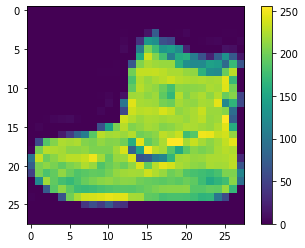

In [ ]:
#Observamos que la primera imagen en el set de entrenamiento tiene pixeles con valores entre 0 y 255
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

Escale estos valores en un rango de 0 a 1 antes de alimentarlos al modelo de la red neuronal. Para hacero, divida los valores por 255. Es importante que el training set y el testing set se pre-procesen de la misma forma:

In [ ]:
x_train = x_train / 255.0

x_test = x_test / 255.0

Para verificar que el set de datos esta en el formato adecuado y que estan listos para construir y entrenar la red, vamos a desplegar las primeras 25 imagenes de el training set y despleguemos el nombre de cada clase debajo de cada imagen.

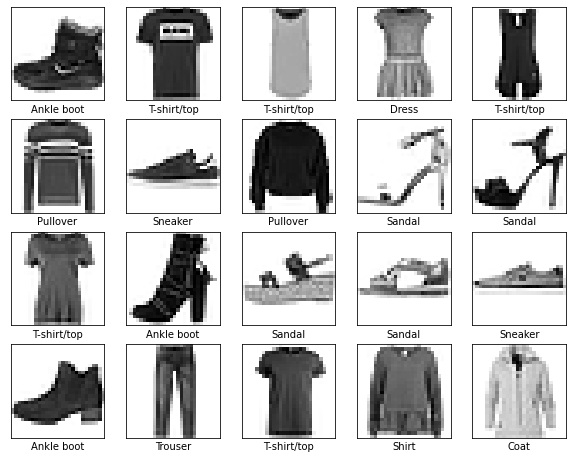

In [ ]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

##Construir el Modelo
Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.



**Transformación One Hot**

Los datos de salida vienen codificados por etiquetas de 0 a 9, la siguiente función sirve para cambiar la codificación a one-hot, de manera que los datos de salida quedan con el formato [muestras,10].

In [ ]:
n_clases = 10
y_train_onehot = keras.utils.to_categorical(y_train, n_clases)
y_test_onehot = keras.utils.to_categorical(y_test, n_clases)

Configurar las Capas
Los bloques de construccion básicos de una red neuronal son las capas o layers. Las capas extraen representaciones de el set de datos que se les alimentan. Estas representaciones son las que se considerarán para el problema que estamos solucionando.

La mayoria del aprendizaje profundo consiste de unir capas sencillas. La mayoria de las capas como tf.keras.layers.Dense, tienen parametros que son aprendidos durante el entrenamiento.

In [ ]:
model1 = keras.models.Sequential() 
model1.add(keras.layers.Flatten(input_shape=(28, 28))) 
model1.add(keras.layers.Dense(64, activation='relu')) 
model1.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
sgd = keras.optimizers.SGD(lr=0.1)
model1.compile(optimizer=sgd,
loss='categorical_crossentropy',
metrics=['accuracy'])

In [ ]:
print(model1.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history1= model1.fit(x_train, y_train_onehot,
epochs=8, validation_data=(x_test, y_test_onehot))

Epoch 1/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6916 - accuracy: 0.7591 - val_loss: 0.4385 - val_accuracy: 0.8419
Epoch 2/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4116 - accuracy: 0.8508 - val_loss: 0.4327 - val_accuracy: 0.8417
Epoch 3/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3756 - accuracy: 0.8619 - val_loss: 0.4029 - val_accuracy: 0.8578
Epoch 4/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3542 - accuracy: 0.8717 - val_loss: 0.3946 - val_accuracy: 0.8534
Epoch 5/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3331 - accuracy: 0.8779 - val_loss: 0.3656 - val_accuracy: 0.8710
Epoch 6/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3153 - accuracy: 0.8833 - val_loss: 0.3773 - val_accuracy: 0.8651
Epoch 7/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3036 - accuracy: 0.8894 - val_loss: 0.3570 - val_accuracy: 0.8740

In [ ]:
test_loss, test_acc = model1.evaluate(x_test, y_test_onehot, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3457 - accuracy: 0.8774

Test accuracy: 0.8773999810218811


Evaluar Exactitud
Siguente, compare como el rendimiento del modelo sobre el set de datos:

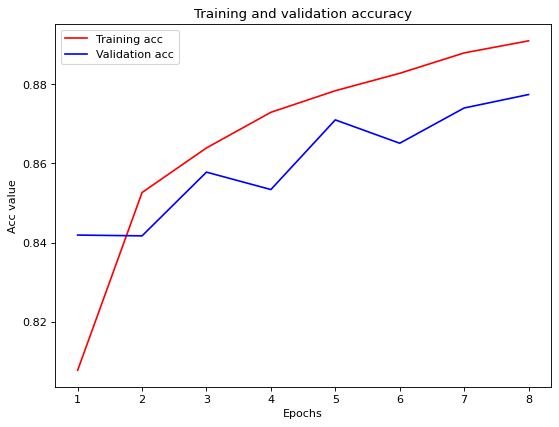

In [ ]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor= 'w', edgecolor='k')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy')
plt.xlabel('Epochs', fontdict=None, labelpad=None)
plt.ylabel('Acc value', fontdict=None, labelpad=None)
plt.legend()

##Con aproximadamente 10.000 parámetros

In [ ]:
model2 = keras.models.Sequential() 
model2.add(keras.layers.Flatten(input_shape=(28, 28))) #Toma la matriz de entrada con formato [28,28] y la aplana a formato [784].
model2.add(keras.layers.Dense(16, activation='relu')) #La primera capa contiene 16 neuronas con función de activación ReLu.
model2.add(keras.layers.Dense(10, activation='softmax')) #La última capa contiene 10 neuronas de salida, con función de activación softmax,

In [ ]:
sgd = keras.optimizers.SGD(lr=0.1)

model2.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
print(model2.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history2= model2.fit(x_train, y_train_onehot, epochs=8, validation_data=(x_test, y_test_onehot))

Epoch 1/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8046 - accuracy: 0.7050 - val_loss: 0.5231 - val_accuracy: 0.8100
Epoch 2/8
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4789 - accuracy: 0.8279 - val_loss: 0.4581 - val_accuracy: 0.8364
Epoch 3/8
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4393 - accuracy: 0.8400 - val_loss: 0.4447 - val_accuracy: 0.8390
Epoch 4/8
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4131 - accuracy: 0.8496 - val_loss: 0.4397 - val_accuracy: 0.8388
Epoch 5/8
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3971 - accuracy: 0.8555 - val_loss: 0.4405 - val_accuracy: 0.8355
Epoch 6/8
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3854 - accuracy: 0.8594 - val_loss: 0.4336 - val_accuracy: 0.8418
Epoch 7/8
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3716 - accuracy: 0.8651 - val_loss: 0.4281 - val_accuracy: 0.8446

Evaluar exactitud siguiente, compare como el rendimiento del modelo sobre el set de datos:

In [ ]:
test_loss, test_acc = model2.evaluate(x_test, y_test_onehot, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 0s - loss: 0.4361 - accuracy: 0.8459

Test accuracy: 0.8458999991416931


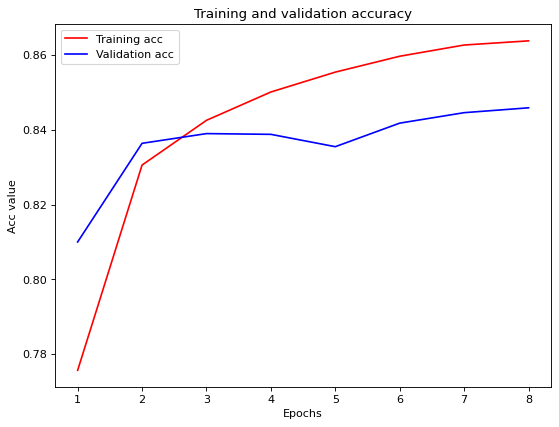

In [ ]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor= 'w', edgecolor='k')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy')
plt.xlabel('Epochs', fontdict=None, labelpad=None)
plt.ylabel('Acc value', fontdict=None, labelpad=None)
plt.legend()

##Con approx 1.000.000 parámetros##

In [ ]:
model3 = keras.models.Sequential() 

model3.add(keras.layers.Flatten(input_shape=(28, 28))) #Toma la matriz de entrada con formato [28,28] y la aplana a formato [784].

model3.add(keras.layers.Dense(256, activation='relu')) #La primera capa contiene 256 neuronas con función de activación ReLu.
model3.add(keras.layers.Dense(1028, activation='relu')) #La segunda capa contiene 1028 neuronas con función de activación ReLu.
model3.add(keras.layers.Dense(512, activation='relu')) #La tercera capa contiene 512 neuronas con función de activación ReLu.
model3.add(keras.layers.Dense(64, activation='relu')) #La cuarta capa contiene 64 neuronas con función de activación ReLu.

model3.add(keras.layers.Dense(10, activation='softmax')) #La última capa contiene 10 neuronas de salida, con función de activación softmax,

In [ ]:
sgd = keras.optimizers.SGD(lr=0.1)
model3.compile(optimizer=sgd,
loss='categorical_crossentropy',
metrics=['accuracy'])

In [ ]:
print(model3.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_5 (Dense)              (None, 1028)              264196    
_________________________________________________________________
dense_6 (Dense)              (None, 512)               526848    
_________________________________________________________________
dense_7 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 1,025,486
Trainable params: 1,025,486
Non-trainable params: 0
____________________________________________

In [ ]:
history3=model3.fit(x_train, y_train_onehot,
epochs=8,
validation_data=(x_test, y_test_onehot))

Epoch 1/8
1875/1875 [==============================] - 22s 12ms/step - loss: 0.7391 - accuracy: 0.7311 - val_loss: 0.4454 - val_accuracy: 0.8442
Epoch 2/8
1875/1875 [==============================] - 22s 11ms/step - loss: 0.3871 - accuracy: 0.8577 - val_loss: 0.4275 - val_accuracy: 0.8374
Epoch 3/8
1875/1875 [==============================] - 22s 11ms/step - loss: 0.3404 - accuracy: 0.8709 - val_loss: 0.3696 - val_accuracy: 0.8652
Epoch 4/8
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3144 - accuracy: 0.8806 - val_loss: 0.3770 - val_accuracy: 0.8625
Epoch 5/8
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2892 - accuracy: 0.8905 - val_loss: 0.3374 - val_accuracy: 0.8760
Epoch 6/8
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2754 - accuracy: 0.8954 - val_loss: 0.3505 - val_accuracy: 0.8711
Epoch 7/8
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2614 - accuracy: 0.9014 - val_loss: 0.3450 - val_ac

In [ ]:
test_loss, test_acc = model3.evaluate(x_test, y_test_onehot, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3161 - accuracy: 0.8832

Test accuracy: 0.8831999897956848


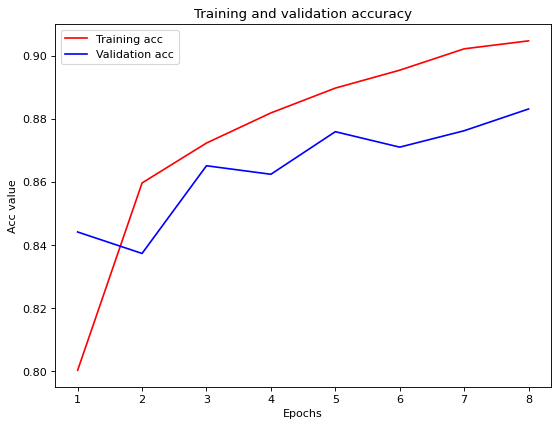

In [ ]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor= 'w', edgecolor='k')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy')
plt.xlabel('Epochs', fontdict=None, labelpad=None)
plt.ylabel('Acc value', fontdict=None, labelpad=None)
plt.legend()

##Sobre la red más grande, añadir una o varias capas de dropout (o bien, opcionalmente, otro método de regularización) y repetir el entrenamiento con los parámetros del apartado 2. A partir de los resultados, explicar las diferencias que aparecen durante el entrenamiento.

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model4 = keras.models.Sequential() 

model4.add(keras.layers.Flatten(input_shape=(28, 28))) #Esta capa toma la matriz de entrada con formato [28,28] y la aplana a formato [784].

model4.add(keras.layers.Dense(256, activation='relu')) #Esta capa contiene 256 neuronas con función de activación ReLu. #La primera capa contiene 256 neuronas con función de activación ReLu.

model4.add(Dropout(0.4))   #Esta capa contiene una capa dropout, para "desaprender" una fracción de lo aprendido

model4.add(keras.layers.Dense(1028, activation='relu')) #Esta capa contiene 1028 neuronas con función de activación ReLu.

model4.add(keras.layers.Dense(512, activation='relu')) #Esta capa contiene 512 neuronas con función de activación ReLu.

model4.add(Dropout(0.4))    #Esta capa contiene una capa dropout, para "desaprender" una fracción de lo aprendido

model4.add(keras.layers.Dense(64, activation='relu')) #Esta capa contiene 64 neuronas con función de activación ReLu.

model4.add(keras.layers.Dense(10, activation='softmax')) #Esta capa contiene 10 neuronas de salida, con función de activación softmax,

In [ ]:
sgd = keras.optimizers.SGD(lr=0.1)
model4.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
print(model4.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1028)              264196    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               526848    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                3

In [ ]:
history4=model4.fit(x_train, y_train_onehot,
epochs=8,
validation_data=(x_test, y_test_onehot))

Epoch 1/8
1875/1875 [==============================] - 22s 12ms/step - loss: 0.8379 - accuracy: 0.6852 - val_loss: 0.4544 - val_accuracy: 0.8356
Epoch 2/8
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4818 - accuracy: 0.8261 - val_loss: 0.4642 - val_accuracy: 0.8344
Epoch 3/8
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4364 - accuracy: 0.8391 - val_loss: 0.4073 - val_accuracy: 0.8549
Epoch 4/8
1875/1875 [==============================] - 22s 12ms/step - loss: 0.4050 - accuracy: 0.8517 - val_loss: 0.3862 - val_accuracy: 0.8594
Epoch 5/8
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3825 - accuracy: 0.8601 - val_loss: 0.3893 - val_accuracy: 0.8470
Epoch 6/8
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3659 - accuracy: 0.8674 - val_loss: 0.3798 - val_accuracy: 0.8614
Epoch 7/8
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3575 - accuracy: 0.8696 - val_loss: 0.3778 - val_ac

In [ ]:
test_loss, test_acc = model4.evaluate(x_test, y_test_onehot, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3433 - accuracy: 0.8746

Test accuracy: 0.8745999932289124


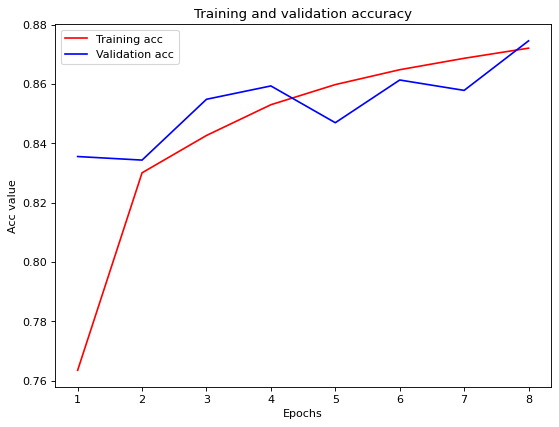

In [ ]:
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor= 'w', edgecolor='k')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy')
plt.xlabel('Epochs', fontdict=None, labelpad=None)
plt.ylabel('Acc value', fontdict=None, labelpad=None)
plt.legend()
plt.show()

##4.Usando la mejor de las redes hasta el momento, cambiar el algoritmo de entrenamiento (optimizador), probando el efecto de otros dos, diferentes al inicial. Tratar de dar una breve explicación de los cambios que aparezcan, en base a las diferencias en los algoritmos. ADAM,

In [ ]:
model5 = keras.models.Sequential() 

model5.add(keras.layers.Flatten(input_shape=(28, 28))) #toma la matriz de entrada con formato [28,28] y la aplana a formato [784].

model5.add(keras.layers.Dense(256, activation='relu')) #La primera capa contiene 64 neuronas con función de activación ReLu.
model5.add(keras.layers.Dense(1028, activation='relu')) #La primera capa contiene 64 neuronas con función de activación ReLu.
model5.add(keras.layers.Dense(512, activation='relu')) #La primera capa contiene 64 neuronas con función de activación ReLu.
model5.add(keras.layers.Dense(64, activation='relu')) #La primera capa contiene 64 neuronas con función de activación ReLu.

model5.add(keras.layers.Dense(10, activation='softmax')) #La última capa contiene 10 neuronas de salida, con función de activación softmax,

**Se usa ADAM como optimizador**

In [ ]:
#Se construye el modelo
adam = keras.optimizers.Adam(lr=0.01)
model5.compile(optimizer=adam,
loss='categorical_crossentropy',
metrics=['accuracy'])

In [ ]:
print(model5.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_11 (Dense)             (None, 1028)              264196    
_________________________________________________________________
dense_12 (Dense)             (None, 512)               526848    
_________________________________________________________________
dense_13 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                650       
Total params: 1,025,486
Trainable params: 1,025,486
Non-trainable params: 0
____________________________________________

In [ ]:
history5=model5.fit(x_train, y_train_onehot,
epochs=8,
validation_data=(x_test, y_test_onehot))

Epoch 1/8
1875/1875 [==============================] - 25s 13ms/step - loss: 0.9498 - accuracy: 0.6782 - val_loss: 0.5986 - val_accuracy: 0.7950
Epoch 2/8
1875/1875 [==============================] - 24s 13ms/step - loss: 0.5490 - accuracy: 0.8117 - val_loss: 0.5868 - val_accuracy: 0.8135
Epoch 3/8
1875/1875 [==============================] - 25s 13ms/step - loss: 0.5036 - accuracy: 0.8260 - val_loss: 0.4917 - val_accuracy: 0.8304
Epoch 4/8
1875/1875 [==============================] - 24s 13ms/step - loss: 0.4822 - accuracy: 0.8347 - val_loss: 0.5044 - val_accuracy: 0.8242
Epoch 5/8
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4866 - accuracy: 0.8367 - val_loss: 0.5682 - val_accuracy: 0.8041
Epoch 6/8
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4644 - accuracy: 0.8417 - val_loss: 0.5331 - val_accuracy: 0.8203
Epoch 7/8
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4640 - accuracy: 0.8414 - val_loss: 0.4832 - val_ac

In [ ]:
test_loss, test_acc = model5.evaluate(x_test, y_test_onehot, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.5041 - accuracy: 0.8322

Test accuracy: 0.8321999907493591


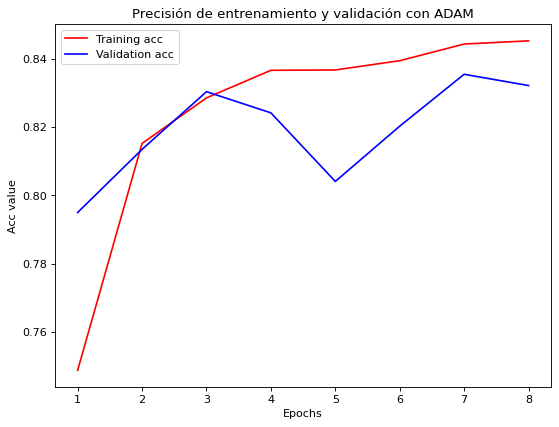

In [ ]:
acc = history5.history['accuracy']
val_acc = history5.history['val_accuracy']
loss = history5.history['loss']
val_loss = history5.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor= 'w', edgecolor='k')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Precisión de entrenamiento y validación con ADAM')
plt.xlabel('Epochs', fontdict=None, labelpad=None)
plt.ylabel('Acc value', fontdict=None, labelpad=None)
plt.legend()
plt.show()

**Se usa Adamgrad como optimizador** 

In [ ]:
model6 = keras.models.Sequential() 

model6.add(keras.layers.Flatten(input_shape=(28, 28))) #toma la matriz de entrada con formato [28,28] y la aplana a formato [784].

model6.add(keras.layers.Dense(256, activation='relu')) #La primera capa contiene 64 neuronas con función de activación ReLu.
model6.add(keras.layers.Dense(1028, activation='relu')) #La primera capa contiene 64 neuronas con función de activación ReLu.
model6.add(keras.layers.Dense(512, activation='relu')) #La primera capa contiene 64 neuronas con función de activación ReLu.
model6.add(keras.layers.Dense(64, activation='relu')) #La primera capa contiene 64 neuronas con función de activación ReLu.

model6.add(keras.layers.Dense(10, activation='softmax')) #La última capa contiene 10 neuronas de salida, con función de activación softmax,

In [ ]:
#ADAMGRAD
adamgrad=keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
model6.compile(optimizer=adamgrad,
loss='categorical_crossentropy',
metrics=['accuracy'])

In [ ]:
print(model6.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_20 (Dense)             (None, 1028)              264196    
_________________________________________________________________
dense_21 (Dense)             (None, 512)               526848    
_________________________________________________________________
dense_22 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_23 (Dense)             (None, 10)                650       
Total params: 1,025,486
Trainable params: 1,025,486
Non-trainable params: 0
____________________________________________

In [ ]:
history6=model6.fit(x_train, y_train_onehot,
epochs=8,
validation_data=(x_test, y_test_onehot))

Epoch 1/8
1875/1875 [==============================] - 24s 13ms/step - loss: 0.7922 - accuracy: 0.7264 - val_loss: 0.4648 - val_accuracy: 0.8305
Epoch 2/8
1875/1875 [==============================] - 24s 13ms/step - loss: 0.4115 - accuracy: 0.8502 - val_loss: 0.4031 - val_accuracy: 0.8555
Epoch 3/8
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3606 - accuracy: 0.8676 - val_loss: 0.3906 - val_accuracy: 0.8613
Epoch 4/8
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3290 - accuracy: 0.8793 - val_loss: 0.3635 - val_accuracy: 0.8706
Epoch 5/8
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3046 - accuracy: 0.8889 - val_loss: 0.3541 - val_accuracy: 0.8729
Epoch 6/8
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2903 - accuracy: 0.8951 - val_loss: 0.3374 - val_accuracy: 0.8751
Epoch 7/8
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2784 - accuracy: 0.8986 - val_loss: 0.3387 - val_ac

In [ ]:
test_loss, test_acc = model6.evaluate(x_test, y_test_onehot, verbose=2)

313/313 - 1s - loss: 0.3312 - accuracy: 0.8849


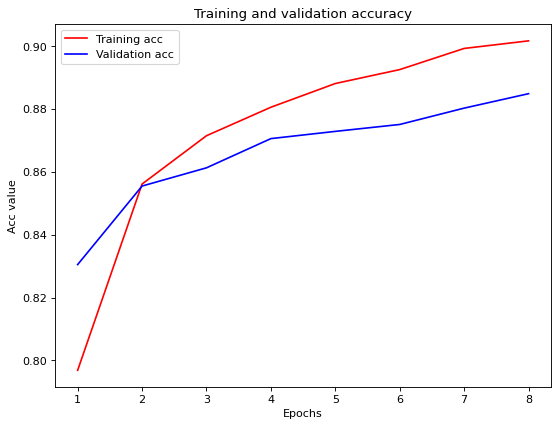

In [ ]:
acc = history6.history['accuracy']
val_acc = history6.history['val_accuracy']
loss = history6.history['loss']
val_loss = history6.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor= 'w', edgecolor='k')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Precicisión para entrenamiento y validación con ADAMGRAD')
plt.xlabel('Epochs', fontdict=None, labelpad=None)
plt.ylabel('Acc value', fontdict=None, labelpad=None)
plt.legend()